In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
breast_cancer = pd.read_csv('data/breast-cancer.csv', header=None)
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [3]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']
breast_cancer.columns = total_cols

In [4]:
breast_cancer.head(5)

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [17]:
numerics = breast_cancer._get_numeric_data()

In [18]:
numerics.head(5)

,id,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


In [22]:
X = numerics.drop(['id','time', "tumor_size"], axis=1)
y= numerics["tumor_size"]

Before we apply PCA we need to standardize/scale the data. For this we can use sklearn's preprocessing library 


In [11]:
# pca.components


NameError: name 'pca' is not defined

In [23]:
#y-target variable , x train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

In [24]:
X_train.shape

(138, 30)

In [25]:
#performing pca

from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(X.columns)+1))]

X_train = pd.DataFrame(X_train, columns = cols)
X_test  = pd.DataFrame(X_test , columns = cols)

#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [26]:
X_train.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30
0,-3.177156,1.366763,1.226066,-0.268861,-0.313760,0.487457,0.180617,0.594923,0.330573,0.765668,...,-0.012691,-0.066966,0.051906,-0.060277,-0.069007,-0.021161,0.024620,0.004975,-0.010493,0.003493
1,1.597034,5.348815,-2.117472,3.921106,1.563855,1.695943,0.113606,1.009155,-1.744600,-0.490829,...,0.337435,-0.618505,-0.183246,-0.012689,0.086298,0.196068,-0.064739,0.062882,0.000350,-0.003564
2,-2.434416,3.883204,-1.515624,-0.919254,-0.892996,-0.318930,-0.249195,-0.373229,-0.457495,0.153771,...,-0.131685,-0.021246,0.146378,-0.039863,-0.076445,0.162610,-0.015696,-0.011154,-0.035612,0.003880
3,-3.359280,2.371789,-1.385941,-0.669597,-0.393970,1.279655,0.573399,0.008678,-1.192401,0.254227,...,0.209311,-0.057152,-0.007227,0.203290,-0.139008,-0.185221,0.073183,0.047190,-0.034071,0.021146
4,-0.464906,1.182678,-2.446789,-1.072835,-1.412345,0.699520,-1.051373,0.631595,-0.944193,0.103865,...,0.069081,-0.044173,0.055742,0.018864,0.024428,-0.128407,-0.033931,0.016225,-0.056283,-0.006030


In [27]:
# Getting
print(pca.explained_variance_ratio_) # Individual variances of each principal components
#print(pca.singular_values_)

[3.42668337e-01 2.55311680e-01 1.12598650e-01 7.00506678e-02
 4.82700793e-02 4.19489263e-02 2.91930167e-02 2.16453385e-02
 1.82980946e-02 1.22353645e-02 1.12138953e-02 8.87557891e-03
 6.35348175e-03 4.18000719e-03 3.50843972e-03 2.61359921e-03
 2.39556727e-03 1.75583825e-03 1.44954462e-03 1.23782033e-03
 9.71759545e-04 8.34332936e-04 7.56907228e-04 5.88071110e-04
 4.26731324e-04 3.71793140e-04 1.35912167e-04 7.20637686e-05
 2.78542283e-05 1.06479149e-05]


In [28]:
variances = pca.explained_variance_ratio_.tolist()

In [31]:


total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(20)



,num_pca,variance,cum_variance
0,1,0.342668,0.342668
1,2,0.255312,0.597980
2,3,0.112599,0.710579
3,4,0.070051,0.780629
4,5,0.048270,0.828899
5,6,0.041949,0.870848
6,7,0.029193,0.900041
7,8,0.021645,0.921687
8,9,0.018298,0.939985
9,10,0.012235,0.952220


<AxesSubplot:xlabel='num_pca', ylabel='cum_variance'>

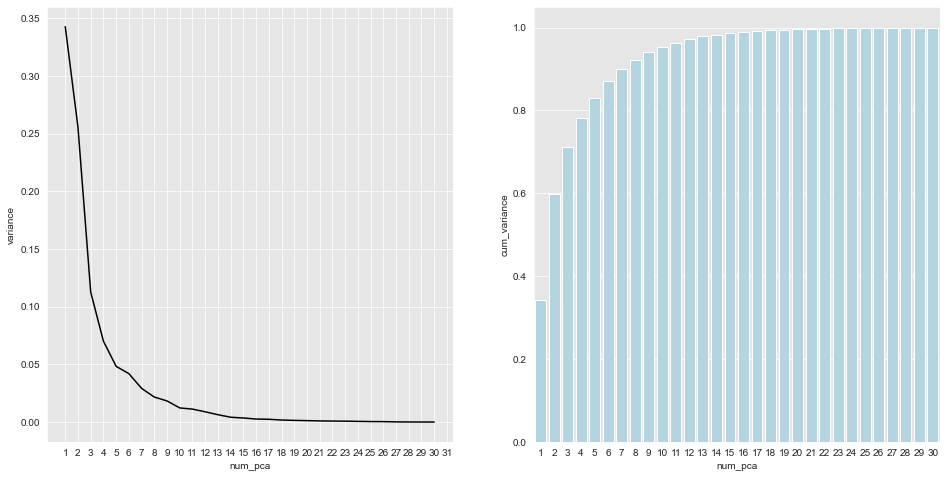

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

 elbow at 12? cum_variance=12 = 97.8663 %

80 % -> 5

In [32]:
pca.components_

array([[ 1.99427138e-01, -8.99073093e-03,  2.16725584e-01,
         2.02682235e-01,  1.38332086e-01,  2.49187762e-01,
         2.78362338e-01,  2.79958320e-01,  1.61803037e-01,
         1.07761739e-01,  2.33760399e-01,  8.93310818e-02,
         2.43014622e-01,  2.40672173e-01,  1.02459324e-01,
         1.91764402e-01,  2.12775281e-01,  1.87698077e-01,
         1.54515776e-01,  1.66718492e-01,  1.96101111e-01,
        -5.24477249e-02,  2.19633766e-01,  1.91885734e-01,
         3.54444797e-02,  1.31547488e-01,  1.82616576e-01,
         2.29758800e-01,  6.64535559e-02,  5.27562654e-02],
       [-2.56322837e-01, -3.84180637e-02, -2.37870852e-01,
        -2.53725294e-01,  2.18937638e-01,  1.72264736e-01,
         6.77382095e-02, -2.29471729e-02,  1.87546035e-01,
         2.98809744e-01, -1.22813475e-01,  2.77251516e-02,
        -1.05283616e-01, -1.60035286e-01,  8.13995319e-02,
         1.80777294e-01,  1.16362614e-01,  3.18037803e-02,
         1.27714385e-01,  1.98421050e-01, -2.48826363e-